# Radial Scope plot 

### How does it work

1. Get a SMILES string from ChemDraw  or any other software able to output SMILES strings (such as [PubChem](https://pubchem.ncbi.nlm.nih.gov/edit3/index.html). For every $R_x$ group put a methyl group.

2. Setup the python dictionary for the settings

3. Setup a dictionary for each $R_x$ you want to replace with like the ones shown in the cell below

4. Execute all cells using the Run button or Ctrl+Enter


In [15]:
from importlib import reload
import radialscope
reload(radialscope)
from radialscope import RadialScope as rs, draw_with_indeces
from radialscope import RadialScope as rs
from radialscope import draw_with_indeces
from IPython.display import SVG


Available colormaps 

![](https://matplotlib.org/2.0.2/_images/colormaps_reference_01.png)

In [16]:
# Show available colormap options
print("Available Colormap Categories:")
rs.print_colormap_options()

Available Colormap Categories:
Available Colormap Categories:

BLUES:
  - Blues
  - Blues_r
  - GnBu
  - PuBu

GREENS:
  - Greens
  - Greens_r
  - BuGn
  - GnBu

REDS:
  - Reds
  - Reds_r
  - OrRd
  - PuRd

PURPLES:
  - Purples
  - Purples_r
  - PuBu
  - BuPu

ORANGES:
  - Oranges
  - Oranges_r
  - OrRd
  - RdOr

GRAYS:
  - Greys
  - Greys_r
  - gray
  - gist_gray

RAINBOW:
  - viridis
  - plasma
  - inferno
  - magma

DIVERGING:
  - RdBu
  - RdBu_r
  - RdYlBu
  - RdYlBu_r
  - Spectral
  - coolwarm

SEQUENTIAL:
  - Blues
  - Greens
  - Reds
  - Purples
  - Oranges
  - Greys


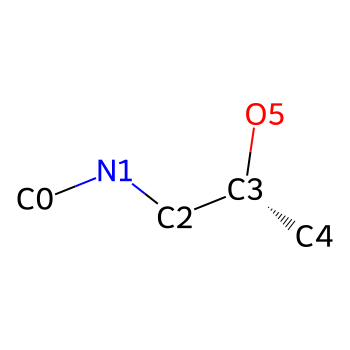

In [17]:
settings={ 'SMILESSTRING':'CNC[C@@H](C)O',  # use methyl groups for your rests, smiles strings can't use labels
  'use_bw_atom_theme':False,  # draw all atoms black
 'use_bold_font': True, # replace all fonts wherever possible with bold text
 'white_cutoff': 100,  #make text of labels white if smaller than this number
  'scalefactor':0.7  #scale the total plot in the end, for large molecule you will need to decrease this or make the viewbox bigger in a vector software such as Inkscape
}


## code that draws the molecule with all indexes so that you can pick the atoms you want to label
SVG(draw_with_indeces(settings))

In [18]:
# NEW FEATURES: 
# 1. You can now pass SMILES strings directly in value_groups!
# 2. You can set separate rounding boundaries for inner and outer circles!
# 3. LOWER VALUES NOW GET DARKER COLORS (reversed color mapping)!
# 4. Multiple colormap options available!
# 5. You can now add substituent labels above each structure!
# 6. You can control label position with label_startangle and label_coverangle!

radial_scope_setup_R1= {
    'rest_label':"R$_1$", # Label of the atom in the radial scope plot
    'no_wedges':4, # Number of wedges in the Radial scope Plot
    'coverangle_wedges':120, # Degrees of a full circle the Rscope should cover
    'startangle':260, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Lower values = darker colors
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Lower values = darker colors
    'OUTERLABEL':"Aβ (%)inhibition", # Label of the outer circle
    'INNERLABEL':"Tau (%)inhibition", # Label of the inner circle
    'value_inner_circle':[ 68.0,55.1,44.4,62.7],
    'value_outer_circle':[ 81.4,88.7,88.2,87.6],
    'min_max_value':[(0,0),(100,100)], # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':[10, 10],  # NEW: [inner_boundary, outer_boundary] - separate cutoffs for each circle!
    'value_groups':["CC1=CC(C(C)(C)C)=CC=C1","CC1=CC(C(C)(C)C)=CC=C1","CC1=CC(C(C)(C)C)=CC=C1","CC1=CC(C(C)(C)C)=CC=C1"], # SMILES strings will be automatically detected and converted to molecular structures!
    'attach_atom_id': 0,
    # 'attach_bond_id': 14,  # Optional: specify the bond ID to which the substituent is attached for better placement
    'substituent_labels': ['37','9','10','30'],  # Labels for each substituent (optional)
    'label_startangle': 140,  # Starting angle for labels (optional, defaults to startangle)
    'label_coverangle': 120,  # Coverage angle for labels (optional, defaults to coverangle_wedges)
}

radial_scope_setup_R2= {
    'rest_label':"R$_2$", # Label of the atom in the radial scope plot
    'no_wedges':4, # Number of wedges in the Radial scope Plot
    'coverangle_wedges':120, # Degrees of a full circle the Rscope should cover
    'startangle':60, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"Aβ (%)inhibition", # Label of the outer circle
    'INNERLABEL':"Tau (%)inhibition", # Label of the inner circle
    'value_inner_circle':[ 68.0,55.1,44.4,62.7],
    'value_outer_circle':[ 81.4,88.7,88.2,87.6],
    'min_max_value':[(0,0),(100,100)], # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':[10,10],  # OLD WAY: single boundary for both circles (still works!)
    'value_groups':["CCNN1CCN(C2=CC=CC=C2)CC1","CNCC(C1=CC=CC=C1)C1=CC=CC=C1","CNCCC(C1=CC=CC=C1)C1=CC=CC=C1","CCNCC(C1=CC=CC=C1)C1=CC=CC=C1"], # SMILES strings will be automatically detected and converted to molecular structures!
    'attach_atom_id': 4,
    'substituent_labels': ['37','9','10','30'],  # Labels for each substituent (optional)
    'label_startangle': -60,  # Starting angle for labels (optional, defaults to startangle)
    'label_coverangle': 120,  # Coverage angle for labels (optional, defaults to coverangle_wedges)
}

radial_scope_setup_R3= {
    'rest_label':"R$_3$", # Label of the atom in the radial scope plot
    'no_wedges':4, # Number of wedges in the Radial scope Plot
    'coverangle_wedges':80, # Degrees of a full circle the Rscope should cover
    'startangle':290, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"Aβ IC50 (µM)", # Label of the outer circle
    'INNERLABEL':"Tau IC50 (µM)", # Label of the inner circle
    'value_inner_circle':[ 7.16,31.17,29.95,17.07],
    'value_outer_circle':[ 17.01,77.69,84.58,34.83],
    'min_max_value':[(0,0),(100,100)], # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':[10,10],  # OLD WAY: single boundary for both circles (still works!)
    'value_groups':["CC","-H","CC","CC"], # SMILES strings will be automatically detected and converted to molecular structures!
    'attach_atom_id': 13,
    'substituent_labels': ['23','24','25','31'],  # Labels for each substituent (optional)
    'label_startangle': 210,  # Starting angle for labels (optional, defaults to startangle)
    'label_coverangle': 80,  # Coverage angle for labels (optional, defaults to coverangle_wedges)
}

radial_scope_setup_R4= {
    'rest_label':"R$_4$", # Label of the atom in the radial scope plot
    'no_wedges':4, # Number of wedges in the Radial scope Plot
    'coverangle_wedges':80, # Degrees of a full circle the Rscope should cover
    'startangle':220, #Start angle of the Rscope 
    'CMAPINNER':"Blues",  # Colormap of the inner circle. Max value has full color, options see below
    'CMAPOUTER':"Greens", # Colormap of the outer circle. Max value has full color
    'OUTERLABEL':"Aβ IC50 (µM)", # Label of the outer circle
    'INNERLABEL':"Tau IC50 (µM)", # Label of the inner circle
    'value_inner_circle':[ 7.16,31.17,29.95,17.07],
    'value_outer_circle':[ 17.01,77.69,84.58,34.83],
    'min_max_value':[(0,0),(100,100)], # Define minimum and maximum for each colorbar [(inner_min, outer_min),(inner_max, outer_max)]
    'rounding':True, # ENABLE rounding if you want something like >99 
    'rounding_boundary':[10,10],  # OLD WAY: single boundary for both circles (still works!)
    'value_groups':["CC","-H","CC","CC"], # SMILES strings will be automatically detected and converted to molecular structures!
    'attach_atom_id': 1,
    'substituent_labels': ['23','24','25','31'],  # Labels for each substituent (optional)
    'label_startangle': 140,  # Starting angle for labels (optional, defaults to startangle)
    'label_coverangle': 80,  # Coverage angle for labels (optional, defaults to coverangle_wedges)
}

File written to: /Users/aman/Desktop/substrate-scope-plot/substrate_scope_replaced.svg


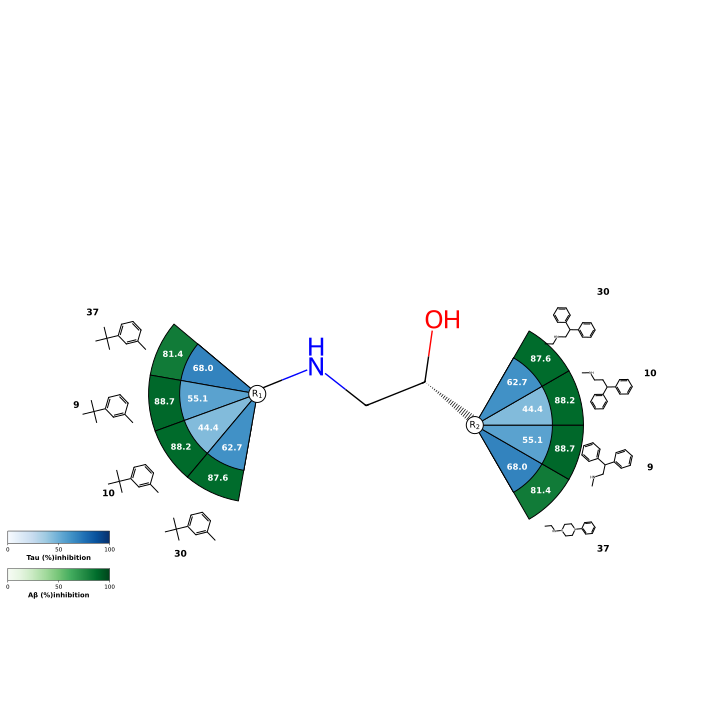

In [19]:
# Generate the plot with the modified color mapping (lower values = darker colors)
scope_plot=rs(settings, radial_scope_setup_R1, radial_scope_setup_R2) # add all radial_scope dictionaries to this call
SVG('substrate_scope_replaced.svg')
